2501578_Pratush_Devkota

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv("/content/drive/MyDrive/assignment-1/Human_Development_Index_Dataset.csv",encoding="latin1")
df.head()

,Unnamed: 0,iso3,country,year,hdi,life_expectancy,pop_millions,hdi_f,hdi_m,life_expec_f,...,gender_development,gender_inequality,secondary_education_f_%,secondary_education_m_%,seats_in_parliament_f_%,seats_in_parliament_m_%,labour_participation_f_%,labour_participation_m_%,co2_emission_tons,mat_footprint_percap_tons
0,1,AFG,Afghanistan,1990,0.284,45.967,10.694796,NaN,NaN,48.397,...,NaN,NaN,1.107733,7.899011,NaN,NaN,NaN,NaN,0.189279,2.1809
1,2,AFG,Afghanistan,1991,0.292,46.663,10.745167,NaN,NaN,49.144,...,NaN,NaN,1.221396,8.137953,NaN,NaN,NaN,NaN,0.178155,2.5264
2,3,AFG,Afghanistan,1992,0.299,47.596,12.057433,NaN,NaN,50.320,...,NaN,NaN,1.335059,8.376896,NaN,NaN,NaN,NaN,0.122920,2.6421
3,4,AFG,Afghanistan,1993,0.307,51.466,14.003760,NaN,NaN,52.739,...,NaN,NaN,1.448722,8.615838,NaN,NaN,NaN,NaN,0.106179,2.3022
4,5,AFG,Afghanistan,1994,0.300,51.495,15.455554,NaN,NaN,53.544,...,NaN,NaN,1.562385,8.854780,NaN,NaN,NaN,NaN,0.094063,1.8948


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Problem 1A – Single Year HDI Exploration (2022)

Explore the HDI dataset for the latest available year (2022)

### Task 1: Extract Latest Year (2022)

In this task, the dataset was explored to identify all unique years available. The data was then filtered to include only records from the year 2022. This filtered dataset was saved as a new dataframe (hdi_2022_df) and used for all subsequent analyses in Problem 1A.

In [5]:
# Check unique years
df['year'].unique()

# Filter dataset for year 2022
hdi_2022_df = df[df['year'] == 2022]

# Preview data
hdi_2022_df.head()



,Unnamed: 0,iso3,country,year,hdi,life_expectancy,pop_millions,hdi_f,hdi_m,life_expec_f,...,gender_development,gender_inequality,secondary_education_f_%,secondary_education_m_%,seats_in_parliament_f_%,seats_in_parliament_m_%,labour_participation_f_%,labour_participation_m_%,co2_emission_tons,mat_footprint_percap_tons
32,33,AFG,Afghanistan,2022,0.462,62.879,41.128771,0.332443,0.534145,66.213,...,0.622,0.665,7.042050,24.077040,27.215190,72.784810,23.33,77.09,0.306318,1.1809
65,66,ALB,Albania,2022,0.789,76.833,2.842321,0.780277,0.798432,79.472,...,0.977,0.116,82.249185,86.476634,35.714286,64.285714,56.08,69.91,1.717758,11.7367
98,99,DZA,Algeria,2022,0.745,77.129,44.903225,0.681844,0.773800,78.457,...,0.881,0.460,42.910456,46.815170,7.005254,92.994746,17.57,65.53,4.079540,8.7199
131,132,AND,Andorra,2022,0.884,83.552,0.079824,NaN,NaN,85.838,...,NaN,NaN,81.718277,84.599998,46.428571,53.571429,NaN,NaN,4.593593,NaN
164,165,AGO,Angola,2022,0.591,61.929,35.588987,0.560890,0.619680,64.541,...,0.905,0.520,21.339865,37.411946,33.636364,66.363636,74.73,78.16,0.507359,3.6568


In [6]:
# First 10 rows
hdi_2022_df.head(10)

# Column names and data types
hdi_2022_df.dtypes




,0
Unnamed: 0,int64
iso3,object
country,object
year,int64
hdi,float64
life_expectancy,float64
pop_millions,float64
hdi_f,float64
hdi_m,float64
life_expec_f,float64


In [7]:
# Rows and columns
hdi_2022_df.shape

(206, 30)

### Task 3: Missing Values and Data Cleaning

The dataset was checked for missing values in each column. Numeric columns stored as text, duplicate rows, and inconsistent entries were identified. Necessary cleaning steps such as type conversion, duplicate removal, and handling missing values were applied to ensure the dataset was suitable for analysis.



In [8]:
# Count missing values
hdi_2022_df.isnull().sum()





,0
Unnamed: 0,0
iso3,0
country,0
year,0
hdi,2
life_expectancy,0
pop_millions,0
hdi_f,13
hdi_m,13
life_expec_f,0


In [9]:
# Replace special missing symbols with NaN
hdi_2022_df = hdi_2022_df.replace("–", np.nan)

# Convert numeric columns to proper type
numeric_cols = ['hdi', 'life_expectancy', 'gross_inc_percap']

for col in numeric_cols:
    hdi_2022_df[col] = pd.to_numeric(hdi_2022_df[col], errors='coerce')

# Remove duplicate rows
hdi_2022_df = hdi_2022_df.drop_duplicates()

# Drop rows where HDI is missing (important column)
hdi_2022_df = hdi_2022_df.dropna(subset=['hdi'])




### Task 4: Descriptive Statistics of HDI (2022)

Key descriptive statistics of HDI for the year 2022 were calculated, including mean, median, and standard deviation. The countries with the highest and lowest HDI values in 2022 were also identified.

In [10]:
mean_hdi = hdi_2022_df['hdi'].mean()
median_hdi = hdi_2022_df['hdi'].median()
std_hdi = hdi_2022_df['hdi'].std()
mean_hdi, median_hdi, std_hdi


(np.float64(0.7228872549019609), 0.7395, 0.15302880386427825)

In [11]:
hdi_2022_df.loc[hdi_2022_df['hdi'].idxmax()][['country','hdi']]


,5609
country,Switzerland
hdi,0.967


In [12]:
hdi_2022_df.loc[hdi_2022_df['hdi'].idxmin()][['country','hdi']]


,5345
country,Somalia
hdi,0.38


### Task 5: Filtering and Sorting
Countries with HDI values greater than 0.800 were filtered from the dataset. This subset was then sorted in descending order based on Gross National Income (GNI) per capita, and the top ten countries were displayed.



In [13]:
high_hdi = hdi_2022_df[hdi_2022_df['hdi'] > 0.800]
high_hdi.sort_values(by='gross_inc_percap', ascending=False).head(10)


,Unnamed: 0,iso3,country,year,hdi,life_expectancy,pop_millions,hdi_f,hdi_m,life_expec_f,...,gender_development,gender_inequality,secondary_education_f_%,secondary_education_m_%,seats_in_parliament_f_%,seats_in_parliament_m_%,labour_participation_f_%,labour_participation_m_%,co2_emission_tons,mat_footprint_percap_tons
3332,3333,LIE,Liechtenstein,2022,0.942,84.656,0.039327,0.924163,0.974295,86.129,...,0.949,NaN,NaN,NaN,28.000000,72.000000,52.79,67.26,3.736776,NaN
4718,4719,QAT,Qatar,2022,0.875,81.559,2.695122,0.892561,0.869100,83.101,...,1.027,0.212,81.832741,71.417976,4.444444,95.555556,61.73,95.33,39.884274,63.5912
5213,5214,SGP,Singapore,2022,0.949,84.133,5.975689,0.945325,0.954078,86.295,...,0.991,0.036,80.464020,85.932037,29.126214,70.873786,63.37,77.00,9.397481,43.1508
2705,2706,IRL,Ireland,2022,0.950,82.716,5.023109,0.942838,0.951392,84.412,...,0.991,0.072,88.585639,86.417415,27.397260,72.602740,59.40,70.51,7.529751,26.3467
3398,3399,LUX,Luxembourg,2022,0.927,82.591,0.647599,0.920482,0.927311,84.770,...,0.993,0.043,96.579350,89.328283,33.333333,66.666667,57.99,65.09,13.185395,49.1903
6104,6105,ARE,United Arab Emirates,2022,0.937,79.196,9.441128,0.922940,0.936027,81.412,...,0.986,0.035,82.029137,86.145172,50.000000,50.000000,55.32,89.45,25.333276,28.1632
5609,5610,CHE,Switzerland,2022,0.967,84.255,8.740472,0.949369,0.977383,85.932,...,0.971,0.018,96.939726,97.517437,39.024390,60.975610,61.49,71.94,4.117550,33.5913
4322,4323,NOR,Norway,2022,0.966,83.393,5.434319,0.957148,0.970415,85.055,...,0.986,0.012,99.094031,99.274980,44.970414,55.029586,62.53,69.59,7.573541,32.0515
6170,6171,USA,United States,2022,0.927,78.203,338.289857,0.927693,0.923405,81.015,...,1.005,0.180,95.424278,95.067093,28.060264,71.939736,56.79,67.97,14.932487,29.3498
2474,2475,HKG,"Hong Kong, China (SAR)",2022,0.956,84.315,7.488865,0.942671,0.969515,86.893,...,0.972,NaN,77.866913,84.067802,NaN,NaN,52.91,64.71,4.373242,NaN


### Task 6: Adding HDI Category Column

A new column called HDI Category was created to classify countries into Low, Medium, High, and Very High HDI groups based on UNDP thresholds. The classifications were verified, and the final dataset was saved as HDI_category_added.csv.

```
Low: HDI < 0.550

Medium: 0.550 - 0.699

High: 0.700 - 0.799

Very High: >= 0.800
```
**Outcomes**

*   A new Cloumn was added to the Dataset
*   Final Dataset was saved to HDI_category_added.csv






In [14]:
def classify_hdi(hdi):
    if hdi < 0.550:
        return "Low"
    elif 0.550 <= hdi <= 0.700:
        return "Medium"
    elif 0.700 <= hdi <= 0.800:
        return "High"
    else:
        return "Very High"
hdi_2022_df['HDI Category'] = hdi_2022_df['hdi'].apply(classify_hdi)
hdi_2022_df.head(10)


,Unnamed: 0,iso3,country,year,hdi,life_expectancy,pop_millions,hdi_f,hdi_m,life_expec_f,...,gender_inequality,secondary_education_f_%,secondary_education_m_%,seats_in_parliament_f_%,seats_in_parliament_m_%,labour_participation_f_%,labour_participation_m_%,co2_emission_tons,mat_footprint_percap_tons,HDI Category
32,33,AFG,Afghanistan,2022,0.462,62.879,41.128771,0.332443,0.534145,66.213,...,0.665,7.042050,24.077040,27.215190,72.784810,23.33,77.09,0.306318,1.1809,Low
65,66,ALB,Albania,2022,0.789,76.833,2.842321,0.780277,0.798432,79.472,...,0.116,82.249185,86.476634,35.714286,64.285714,56.08,69.91,1.717758,11.7367,High
98,99,DZA,Algeria,2022,0.745,77.129,44.903225,0.681844,0.773800,78.457,...,0.460,42.910456,46.815170,7.005254,92.994746,17.57,65.53,4.079540,8.7199,High
131,132,AND,Andorra,2022,0.884,83.552,0.079824,NaN,NaN,85.838,...,NaN,81.718277,84.599998,46.428571,53.571429,NaN,NaN,4.593593,NaN,Very High
164,165,AGO,Angola,2022,0.591,61.929,35.588987,0.560890,0.619680,64.541,...,0.520,21.339865,37.411946,33.636364,66.363636,74.73,78.16,0.507359,3.6568,Medium
197,198,ATG,Antigua and Barbuda,2022,0.826,79.236,0.093763,NaN,NaN,81.645,...,NaN,NaN,NaN,31.428571,68.571429,NaN,NaN,6.401056,NaN,Very High
230,231,ARG,Argentina,2022,0.849,76.064,45.510318,0.841405,0.845473,79.277,...,0.292,73.591541,71.648085,44.376900,55.623100,52.08,71.74,4.190779,14.4512,Very High
263,264,ARM,Armenia,2022,0.786,73.372,2.780469,0.795110,0.774942,78.447,...,0.198,96.001381,97.050957,35.514019,64.485981,62.80,71.84,2.531088,7.3553,High
296,297,AUS,Australia,2022,0.946,83.579,26.177414,0.934602,0.955941,85.453,...,0.063,94.580063,94.430069,44.493392,55.506608,62.31,71.13,14.914763,26.9245,Very High
329,330,AUT,Austria,2022,0.926,82.412,8.939617,0.911592,0.937756,84.600,...,0.048,100.000000,100.000000,40.983607,59.016393,56.55,66.69,7.399461,27.9621,Very High


In [15]:
hdi_2022_df['HDI Category'].value_counts()

,count
HDI Category,
Very High,71
High,53
Medium,45
Low,35


In [16]:
hdi_2022_df.to_csv("HDI_category_added.csv", index=False)


## Problem - 1B - HDI Visualization and Trend Analysis (2020 - 2022)


### Task2: Data Cleaning
Essential columns such as HDI, country name, and year were checked for missing or inconsistent values. Issues such as duplicates, incorrect data types, and inconsistent country names were addressed. All cleaning decisions were justified to maintain data integrity

In [17]:
# Filter years 2020-2022
hdi_1b_df = df[df['year'].isin([2020, 2021, 2022])]

# Save file
hdi_1b_df.to_csv("HDI_problem1B.csv", index=False)

hdi_1b_df.head()


,Unnamed: 0,iso3,country,year,hdi,life_expectancy,pop_millions,hdi_f,hdi_m,life_expec_f,...,gender_development,gender_inequality,secondary_education_f_%,secondary_education_m_%,seats_in_parliament_f_%,seats_in_parliament_m_%,labour_participation_f_%,labour_participation_m_%,co2_emission_tons,mat_footprint_percap_tons
30,31,AFG,Afghanistan,2020,0.488,62.575,38.972231,0.381373,0.548741,65.432,...,0.695,0.674,6.092345,15.945160,27.215190,72.784810,16.50,66.84,0.305040,1.5554
31,32,AFG,Afghanistan,2021,0.473,61.982,40.099462,0.379129,0.528559,65.279,...,0.717,0.653,6.395730,14.865710,27.215190,72.784810,23.33,77.09,0.306318,1.2351
32,33,AFG,Afghanistan,2022,0.462,62.879,41.128771,0.332443,0.534145,66.213,...,0.622,0.665,7.042050,24.077040,27.215190,72.784810,23.33,77.09,0.306318,1.1809
63,64,ALB,Albania,2020,0.784,76.989,2.866849,0.775404,0.793220,79.676,...,0.978,0.129,82.249185,86.476634,29.508197,70.491803,54.45,68.91,1.750668,10.4704
64,65,ALB,Albania,2021,0.785,76.463,2.854710,0.777866,0.792942,79.173,...,0.981,0.117,82.249185,86.476634,35.714286,64.285714,56.08,69.91,1.717758,11.5865


In [18]:
# Keep essential columns clean
hdi_1b_df = hdi_1b_df.dropna(subset=['hdi', 'country', 'year'])

# Convert HDI to numeric
hdi_1b_df['hdi'] = pd.to_numeric(hdi_1b_df['hdi'], errors='coerce')

# Remove duplicates
hdi_1b_df = hdi_1b_df.drop_duplicates()


In [19]:
hdi_1b_df['country'] = (
hdi_1b_df['country']
    .str.strip()
    .str.title()
)


In [20]:
hdi_1b_df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 610 entries, 30 to 6797
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Unnamed: 0                 610 non-null    int64  
 1   iso3                       610 non-null    object 
 2   country                    610 non-null    object 
 3   year                       610 non-null    int64  
 4   hdi                        610 non-null    float64
 5   life_expectancy            610 non-null    float64
 6   pop_millions               610 non-null    float64
 7   hdi_f                      577 non-null    float64
 8   hdi_m                      577 non-null    float64
 9   life_expec_f               610 non-null    float64
 10  life_expec_m               610 non-null    float64
 11  expec_yr_school            610 non-null    float64
 12  expec_yr_school_f          610 non-null    float64
 13  expec_yr_school_m          610 non-null    float64
 1

In [21]:
selected_countries = [
    'Nepal',
    'India',
    'China',
    'United States',
    'Norway'
]


In [22]:
country_hdi_df = hdi_1b_df[
   hdi_1b_df['country'].isin(selected_countries)
]


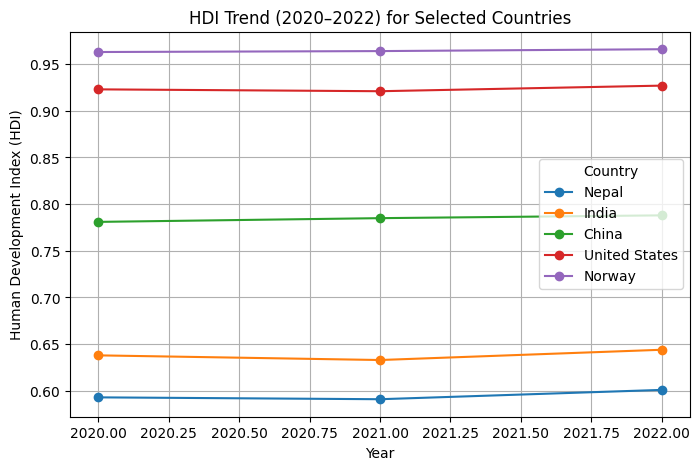

In [23]:
plt.figure(figsize=(8, 5))
for country in selected_countries:
    country_data = country_hdi_df[
        country_hdi_df['country'] == country
    ]
    plt.plot(
        country_data['year'],
        country_data['hdi'],
        marker='o',
        label=country
    )

plt.xlabel("Year")
plt.ylabel("Human Development Index (HDI)")
plt.title("HDI Trend (2020–2022) for Selected Countries")
plt.legend(title="Country")
plt.grid(True)
plt.show()

**Bar Chart: Average HDI by Region (2020-2022)**

Plot a bar chart comparing average HDI across regions for year 2020, 2021, 2022.

**Method**
* Add column region for the visulization from the iso3.



In [24]:
regions= {
    "AFG":"Asia","ARM":"Asia","AZE":"Asia","BHR":"Asia","BGD":"Asia",
    "BTN":"Asia","BRN":"Asia","KHM":"Asia","CHN":"Asia","CYP":"Asia",
    "GEO":"Asia","IND":"Asia","IDN":"Asia","IRN":"Asia","IRQ":"Asia",
    "ISR":"Asia","JPN":"Asia","JOR":"Asia","KAZ":"Asia","KWT":"Asia",
    "KGZ":"Asia","LAO":"Asia","LBN":"Asia","MYS":"Asia","MDV":"Asia",
    "MNG":"Asia","MMR":"Asia","NPL":"Asia","PRK":"Asia","OMN":"Asia",
    "PAK":"Asia","PHL":"Asia","QAT":"Asia","SAU":"Asia","SGP":"Asia",
    "KOR":"Asia","LKA":"Asia","SYR":"Asia","TJK":"Asia","THA":"Asia",
    "TUR":"Asia","TKM":"Asia","ARE":"Asia","UZB":"Asia","VNM":"Asia",
    "YEM":"Asia",

    "ALB":"Europe","AUT":"Europe","BEL":"Europe","BGR":"Europe",
    "BIH":"Europe","BLR":"Europe","CHE":"Europe","CZE":"Europe",
    "DEU":"Europe","DNK":"Europe","ESP":"Europe","EST":"Europe",
    "FIN":"Europe","FRA":"Europe","GBR":"Europe","GRC":"Europe",
    "HRV":"Europe","HUN":"Europe","IRL":"Europe","ISL":"Europe",
    "ITA":"Europe","LTU":"Europe","LUX":"Europe","LVA":"Europe",
    "MDA":"Europe","MKD":"Europe","MLT":"Europe","MNE":"Europe",
    "NLD":"Europe","NOR":"Europe","POL":"Europe","PRT":"Europe",
    "ROU":"Europe","RUS":"Europe","SRB":"Europe","SVK":"Europe",
    "SVN":"Europe","SWE":"Europe","UKR":"Europe",

    "DZA":"Africa","AGO":"Africa","BEN":"Africa","BFA":"Africa",
    "BWA":"Africa","CAF":"Africa","CIV":"Africa","CMR":"Africa",
    "COD":"Africa","COG":"Africa","COM":"Africa","DJI":"Africa",
    "EGY":"Africa","ERI":"Africa","ETH":"Africa","GAB":"Africa",
    "GHA":"Africa","GIN":"Africa","GMB":"Africa","GNB":"Africa",
    "KEN":"Africa","LBR":"Africa","LBY":"Africa","LSO":"Africa",
    "MAR":"Africa","MDG":"Africa","MLI":"Africa","MOZ":"Africa",
    "MRT":"Africa","MUS":"Africa","MWI":"Africa","NAM":"Africa",
    "NER":"Africa","NGA":"Africa","RWA":"Africa","SDN":"Africa",
    "SEN":"Africa","SLE":"Africa","SOM":"Africa","SSD":"Africa",
    "STP":"Africa","TCD":"Africa","TGO":"Africa","TUN":"Africa",
    "TZA":"Africa","UGA":"Africa","ZAF":"Africa","ZMB":"Africa",
    "ZWE":"Africa",

    "CAN":"North America","USA":"North America","MEX":"North America",
    "BLZ":"North America","GTM":"North America","HND":"North America",
    "SLV":"North America","NIC":"North America","PAN":"North America",
    "CRI":"North America","CUB":"North America","DOM":"North America",
    "HTI":"North America","JAM":"North America","BHS":"North America",

    "ARG":"South America","BOL":"South America","BRA":"South America",
    "CHL":"South America","COL":"South America","ECU":"South America",
    "GUY":"South America","PER":"South America","PRY":"South America",
    "SUR":"South America","URY":"South America","VEN":"South America",

    "AUS":"Australia","NZL":"Australia"
}
hdi_1b_df['region']=hdi_1b_df['iso3'].map(regions)
hdi_1b_df[['iso3', 'country', 'region']]


,iso3,country,region
30,AFG,Afghanistan,Asia
31,AFG,Afghanistan,Asia
32,AFG,Afghanistan,Asia
63,ALB,Albania,Europe
64,ALB,Albania,Europe
...,...,...,...
6763,ZZJ.SSA,Sub-Saharan Africa,NaN
6764,ZZJ.SSA,Sub-Saharan Africa,NaN
6795,ZZK.WORLD,World,NaN
6796,ZZK.WORLD,World,NaN


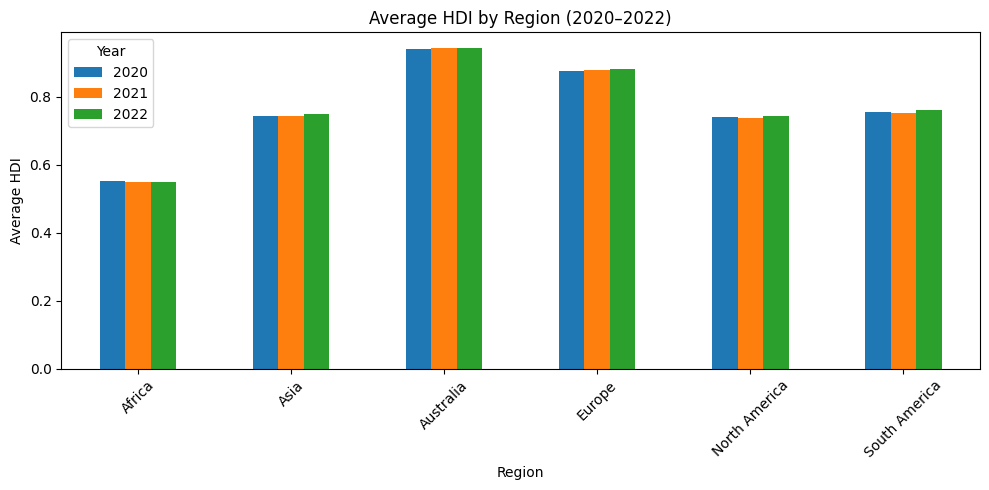

In [25]:
region_avg_hdi = (
    hdi_1b_df.groupby(["region", "year"])["hdi"].mean().reset_index())
pivot_df = region_avg_hdi.pivot(index="region", columns="year", values="hdi")
pivot_df.plot(kind="bar", figsize=(10, 5))
plt.xlabel("Region")
plt.ylabel("Average HDI")
plt.title("Average HDI by Region (2020–2022)")
plt.xticks(rotation=45)
plt.legend(title="Year")
plt.tight_layout()
plt.show()

**Box Plot: HDI Distribution for 2020, 2021, and 2022**


Show the HDI spread for each of the year 2020, 2021, 2022 using box plot.

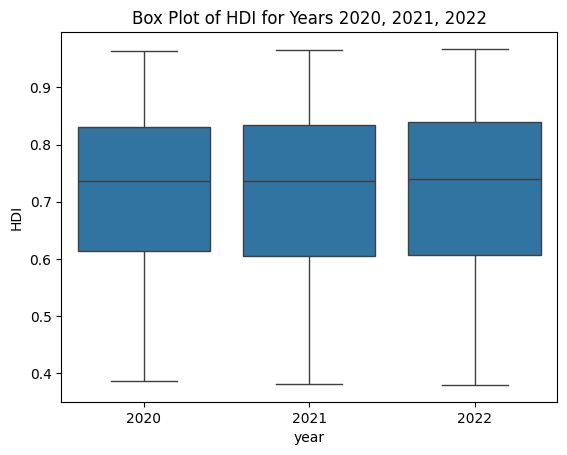

In [26]:
sns.boxplot(data=hdi_1b_df, x='year', y='hdi' )
plt.ylabel('HDI')
plt.title('Box Plot of HDI for Years 2020, 2021, 2022')
plt.show()

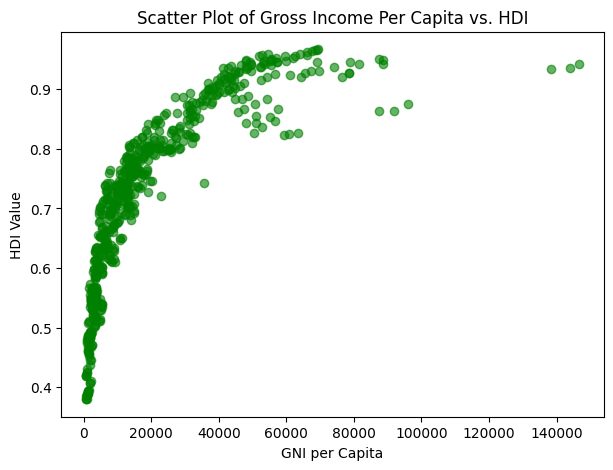

In [27]:
hdi_1b_df['gross_inc_percap'] = pd.to_numeric(
    hdi_1b_df['gross_inc_percap'], errors='coerce'
)

plt.figure(figsize=(7,5))
plt.scatter(
    hdi_1b_df['gross_inc_percap'],
    hdi_1b_df['hdi'],
    color='green',
    alpha=0.6
)
plt.xlabel("GNI per Capita")
plt.ylabel("HDI Value")
plt.title("Scatter Plot of Gross Income Per Capita vs. HDI")
plt.show()


### Task 4: Short Analysis Questions
Changes in HDI over time were analyzed to identify improvements and declines across countries. Regional performance was compared, and possible impacts of global events such as COVID-19 were discussed.

In [28]:
hdi_change = (
    hdi_1b_df
    .pivot(index='country', columns='year', values='hdi')
)

hdi_change['change_2020_2022'] = hdi_change[2022] - hdi_change[2020]

hdi_change_sorted = hdi_change.sort_values('change_2020_2022', ascending=False)

hdi_change_sorted.head(5)


year,2020,2021,2022,change_2020_2022
country,,,,
Andorra,0.843,0.855,0.884,0.041
Azerbaijan,0.722,0.738,0.760,0.038
Ecuador,0.734,0.746,0.765,0.031
Maldives,0.737,0.753,0.762,0.025
Mexico,0.757,0.757,0.781,0.024


From here we can see that andorra has highest HDI change .

In [29]:
hdi_change_sorted.tail(5)


year,2020,2021,2022,change_2020_2022
country,,,,
Namibia,0.634,0.616,0.610,-0.024
Afghanistan,0.488,0.473,0.462,-0.026
Ukraine,0.762,0.755,0.734,-0.028
Timor-Leste,0.633,0.574,0.566,-0.067
Somalia,NaN,NaN,0.380,NaN


the bottom countries having the lowest change in HDI are somalia followed by timor-leste,ukraines,afg and namibia

In [30]:
region_avg = (
    hdi_1b_df
    .groupby('region')['hdi']
    .mean()
    .sort_values(ascending=False)
)

region_avg


,hdi
region,
Australia,0.942167
Europe,0.879026
South America,0.757139
Asia,0.745096
North America,0.740600
Africa,0.550834


## Problem 2 - Advanced HDI Exploration (South Asia)
Perform advanced analysis of HDI data, focusing on South Asian countries, composite metrics, outlier detection, metric relationships, and gap analysis.

### Task 1: Create South Asia Subset
Filter the dataset to include the south Asia Country.

A subset of South Asian countries was created using a predefined list. The filtered dataset was saved as HDI_SouthAsia.csv for further analysis.

In [31]:
south_asia = [
  "Afghanistan",
  "Bangladesh",
    "Bhutan",
    "India",
    "Maldives",
    "Nepal",
    "Pakistan",
    "Sri Lanka"
]

In [32]:
south_asia_df = df[df["country"].isin(south_asia)]

In [33]:
# Save filtered dataset
south_asia_df.to_csv("HDI_SouthAsia.csv", index=False)

### Task 2: Composite Development Score
A Composite Score was calculated using Life Expectancy Index and GNI per Capita Index. Countries were ranked based on this score, visualized using a horizontal bar chart, and compared with HDI rankings.



In [34]:
# Calculate Composite Development Score
south_asia_df['Composite_Score'] = (
    0.30 * south_asia_df['life_expectancy'] +  # 30% weight for life expectancy
    0.30 * south_asia_df['gross_inc_percap']   # 30% weight for gross income per capita
)

# Group by country and calculate the mean HDI and Composite Score
south_asia_avg= south_asia_df.groupby('country')[['hdi','Composite_Score']].mean().reset_index()

# Sort countries by Composite_Score in descending order to rank them
HDI_SouthAsia_Rank = south_asia_avg.sort_values(
    by='Composite_Score',
    ascending=False
)

# Display the country and its Composite_Score
HDI_SouthAsia_Rank[['country', 'Composite_Score']]

/tmp/ipython-input-4294019875.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  south_asia_df['Composite_Score'] = (


,country,Composite_Score
4,Maldives,4154.252676
7,Sri Lanka,2502.612949
2,Bhutan,1878.321569
6,Pakistan,1184.282350
3,India,1151.101140
1,Bangladesh,1042.583232
5,Nepal,779.209282
0,Afghanistan,555.454413


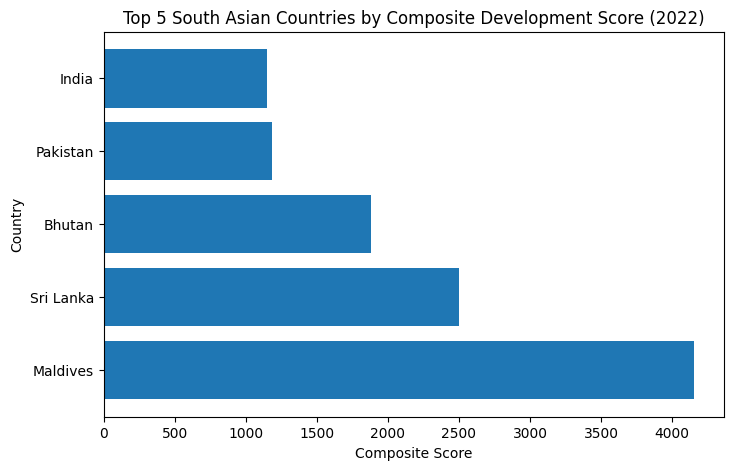

In [35]:
# Select the top 5 countries from the ranked DataFrame based on Composite_Score
top5 = HDI_SouthAsia_Rank.head(5)

# Create a new figure for the plot with a specified size
plt.figure(figsize=(8, 5))

# Create a horizontal bar chart
# The y-axis represents the country names and the x-axis represents their Composite Scores
plt.barh(top5["country"], top5["Composite_Score"])
# Set the label for the x-axis
plt.xlabel("Composite Score")
# Set the label for the y-axis
plt.ylabel("Country")
# Set the title of the plot
plt.title("Top 5 South Asian Countries by Composite Development Score (2022)")
# Display the plot
plt.show()

In [36]:
hdi_rank = south_asia_df.sort_values(
    'hdi', ascending=False
)
comparison = HDI_SouthAsia_Rank[['country', 'Composite_Score']].merge(
    hdi_rank[['country', 'hdi']],
    on='country'
)
comparison

,country,Composite_Score,hdi
0,Maldives,4154.252676,0.762
1,Maldives,4154.252676,0.753
2,Maldives,4154.252676,0.753
3,Maldives,4154.252676,0.747
4,Maldives,4154.252676,0.740
...,...,...,...
259,Afghanistan,555.454413,0.307
260,Afghanistan,555.454413,0.300
261,Afghanistan,555.454413,0.299
262,Afghanistan,555.454413,0.292


### Task 3: Outlier Detection

Outliers in HDI and GNI per capita were identified using the 1.5×IQR method. These outliers were highlighted in a scatter plot and discussed to understand why they deviate from the general pattern.

In [37]:
HDI_Q1=south_asia_df['hdi'].quantile(0.25)
HDI_Q3=south_asia_df['hdi'].quantile(0.75)
IQR=HDI_Q3-HDI_Q1
lower_outlier=HDI_Q1-1.5*IQR
higher_outlier=HDI_Q3+1.5*IQR
outliers=(south_asia_df['hdi']<lower_outlier) | (south_asia_df['hdi']>higher_outlier)

In [38]:
GNI_per_Capita_Q1=south_asia_df['gross_inc_percap'].quantile(0.25)
GNI_per_Capita_Q3=south_asia_df['gross_inc_percap'].quantile(0.75)
GNI_per_Capita_IQR=GNI_per_Capita_Q3-GNI_per_Capita_Q1
GNI_per_Capita_lower_outlier=GNI_per_Capita_Q1-1.5*GNI_per_Capita_IQR
GNI_per_Capita_higher_outlier=GNI_per_Capita_Q3+1.5*GNI_per_Capita_IQR
GNI_per_Capita_outliers= (south_asia_df['gross_inc_percap']<GNI_per_Capita_lower_outlier) | (south_asia_df['gross_inc_percap']>GNI_per_Capita_higher_outlier)

/tmp/ipython-input-2874484000.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  south_asia_df["Outlier"] = (outliers | GNI_per_Capita_outliers).copy()


Text(0.5, 1.0, 'Scatter Plot of HDI')

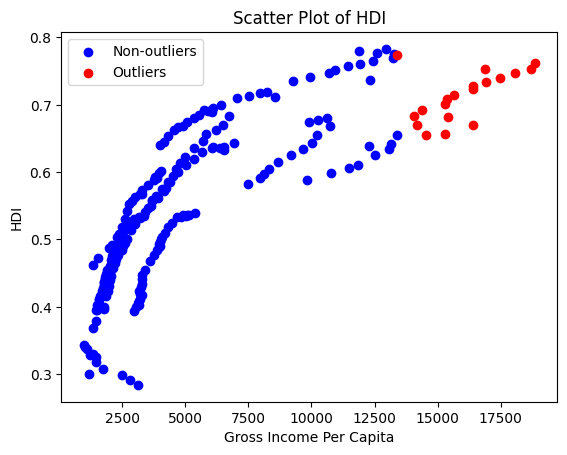

In [39]:
south_asia_df["Outlier"] = (outliers | GNI_per_Capita_outliers).copy()
plt.scatter(
    south_asia_df.loc[~south_asia_df["Outlier"], "gross_inc_percap"],
    south_asia_df.loc[~south_asia_df["Outlier"], "hdi"],
    label="Non-outliers",
    color="blue"
)
plt.scatter(
    south_asia_df.loc[south_asia_df["Outlier"], "gross_inc_percap"],
    south_asia_df.loc[south_asia_df["Outlier"], "hdi"],
    label="Outliers",
    color="red"
)
plt.legend()
plt.ylabel  ('HDI')
plt.xlabel('Gross Income Per Capita')
plt.title('Scatter Plot of HDI')



### Task 4: Exploring Metric Relationships

The relationships between HDI and selected metrics (Gender Development Index and Life Expectancy Index) were analyzed using Pearson correlation and scatter plots with trendlines.

In [40]:
Gender_Development_Index=south_asia_df['gender_development']
Life_Expectancy_Index=south_asia_df['life_expectancy']
Gender_Development_Index_coorelation=Gender_Development_Index.corr(south_asia_df['hdi'])
Life_Expectancy_Index_coorelation=Life_Expectancy_Index.corr(south_asia_df['hdi'])
print("Gender Development Index Correlation:",Gender_Development_Index_coorelation)
print("Life Expectancy Index Correlation:",Life_Expectancy_Index_coorelation)


Gender Development Index Correlation: 0.865621005012754
Life Expectancy Index Correlation: 0.9587610559043978


In [41]:
south_asia_df[['life_expectancy', 'hdi']].isna().sum(),south_asia_df[['gender_development', 'hdi']].isna().sum()


(life_expectancy     0
 hdi                25
 dtype: int64,
 gender_development    43
 hdi                   25
 dtype: int64)

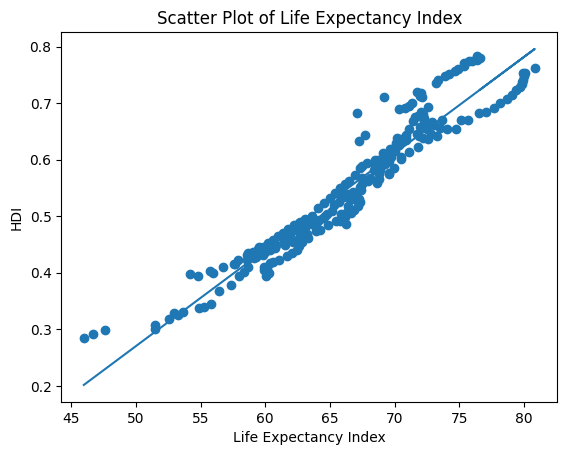

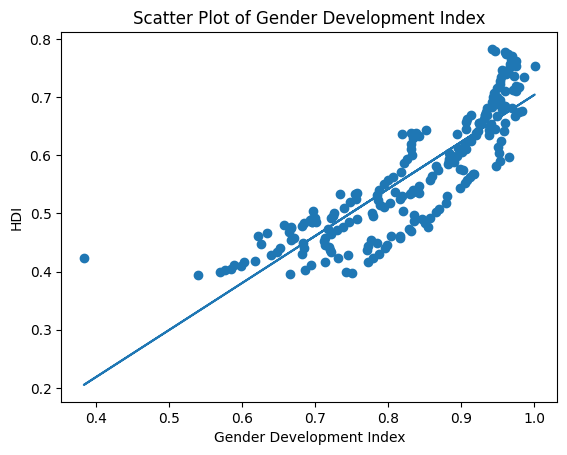

In [42]:

# Selecting variables (same as before)
x = south_asia_df['life_expectancy']
y = south_asia_df['hdi']

# Removing missing values to avoid SVD convergence error
mask = np.isfinite(x) & np.isfinite(y)
x_clean = x[mask]
y_clean = y[mask]

plt.scatter(x_clean, y_clean)

# Linear fit (same approach, cleaned data)
m, b = np.polyfit(x_clean, y_clean, 1)
plt.plot(x_clean, m*x_clean + b)

plt.xlabel('Life Expectancy Index')
plt.ylabel('HDI')
plt.title('Scatter Plot of Life Expectancy Index')
plt.show()

# Second relationship (same logic, same syntax style)
x2 = south_asia_df['gender_development']
y2 = south_asia_df['hdi']

mask2 = np.isfinite(x2) & np.isfinite(y2)
x2_clean = x2[mask2]
y2_clean = y2[mask2]

plt.scatter(x2_clean, y2_clean)

m2, b2 = np.polyfit(x2_clean, y2_clean, 1)
plt.plot(x2_clean, m2*x2_clean + b2)

plt.xlabel('Gender Development Index')
plt.ylabel('HDI')
plt.title('Scatter Plot of Gender Development Index')
plt.show()


### Task 5: Gap Analysis

A new metric, GNI-HDI Gap, was calculated to identify mismatches between income and human development. Countries were ranked based on this gap, and the implications were discussed.

In [43]:
GNI_HDI_Gap=south_asia_df['gross_inc_percap']-south_asia_df['hdi']
south_asia_df['GNI_HDI_Gap']=GNI_HDI_Gap
HDI_SouthAsia_grouped=south_asia_df.groupby('country')['GNI_HDI_Gap'].mean().reset_index()
Descending_GNI_HDI_Gap=HDI_SouthAsia_grouped.sort_values(by='GNI_HDI_Gap',ascending=False)
Ascending_GNI_HDI_Gap=HDI_SouthAsia_grouped.sort_values(by='GNI_HDI_Gap')
top_GNI_HDI_Gap=Descending_GNI_HDI_Gap.head(3)
buttom_GNI_HDI_Gap=Ascending_GNI_HDI_Gap.head(3)
top_GNI_HDI_Gap,buttom_GNI_HDI_Gap

/tmp/ipython-input-538302319.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  south_asia_df['GNI_HDI_Gap']=GNI_HDI_Gap


(     country   GNI_HDI_Gap
 4   Maldives  14670.635594
 2     Bhutan   9320.175767
 7  Sri Lanka   8268.373527,
        country  GNI_HDI_Gap
 0  Afghanistan  1793.487770
 5        Nepal  2532.443971
 1   Bangladesh  3408.490410)

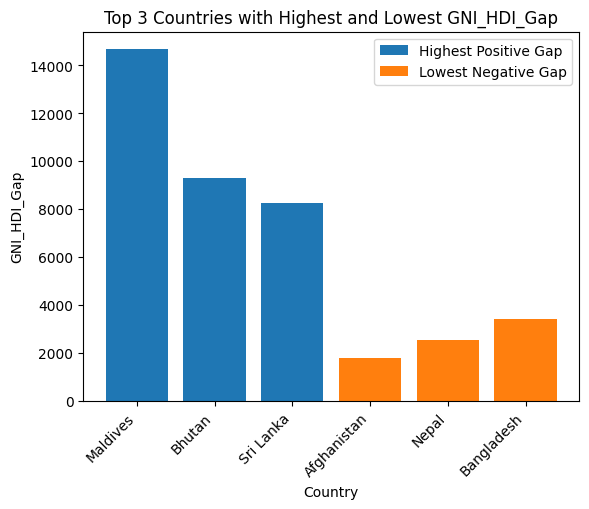

In [44]:
plt.bar(top_GNI_HDI_Gap['country'],top_GNI_HDI_Gap['GNI_HDI_Gap'],label='Highest Positive Gap')
plt.bar(buttom_GNI_HDI_Gap['country'],buttom_GNI_HDI_Gap['GNI_HDI_Gap'], label='Lowest Negative Gap')
plt.legend()
plt.xticks(rotation=45, ha="right")
plt.xlabel('Country')
plt.ylabel('GNI_HDI_Gap')
plt.title('Top 3 Countries with Highest and Lowest GNI_HDI_Gap')
plt.show()

Highest are maldives,bhutan.sri-lanka and lowest are afganistan,nepal and bangaldesh

## Problem 3 - Comparative Regional Analysis: South Asia vs Middle East

comparative analysis of HDI and related metrics between South Asia and the Middle East using the 2020-2022 dataset from Problem 1B.

Task 1: Regional Subsets

Separate datasets for South Asia and the Middle East were created from the 2020–2022 data and saved for comparison.

In [45]:
# South Asia countries
south_Asia = [
    "Afghanistan", "Bangladesh", "Bhutan", "India",
    "Maldives", "Nepal", "Pakistan", "Sri Lanka"
]

# Middle East countries
middle_east = [
    "Bahrain", "Iran", "Iraq", "Israel", "Jordan",
    "Kuwait", "Lebanon", "Oman", "Palestine",
    "Qatar", "Saudi Arabia", "Syria",
    "United Arab Emirates", "Yemen"
]


In [46]:
# Filter South Asia (2020–2022)
sa_2020_22 = hdi_1b_df[hdi_1b_df['country'].isin(south_asia)]

# Filter Middle East (2020–2022)
me_2020_22 = hdi_1b_df[hdi_1b_df['country'].isin(middle_east)]

# Save datasets
sa_2020_22.to_csv("HDI_SouthAsia_2020_2022.csv", index=False)
me_2020_22.to_csv("HDI_MiddleEast_2020_2022.csv", index=False)

sa_2020_22.head()


,Unnamed: 0,iso3,country,year,hdi,life_expectancy,pop_millions,hdi_f,hdi_m,life_expec_f,...,gender_inequality,secondary_education_f_%,secondary_education_m_%,seats_in_parliament_f_%,seats_in_parliament_m_%,labour_participation_f_%,labour_participation_m_%,co2_emission_tons,mat_footprint_percap_tons,region
30,31,AFG,Afghanistan,2020,0.488,62.575,38.972231,0.381373,0.548741,65.432,...,0.674,6.092345,15.945160,27.215190,72.784810,16.50,66.84,0.305040,1.5554,Asia
31,32,AFG,Afghanistan,2021,0.473,61.982,40.099462,0.379129,0.528559,65.279,...,0.653,6.395730,14.865710,27.215190,72.784810,23.33,77.09,0.306318,1.2351,Asia
32,33,AFG,Afghanistan,2022,0.462,62.879,41.128771,0.332443,0.534145,66.213,...,0.665,7.042050,24.077040,27.215190,72.784810,23.33,77.09,0.306318,1.1809,Asia
459,460,BGD,Bangladesh,2020,0.657,71.968,167.420951,0.619431,0.682912,73.957,...,0.502,43.659868,50.507937,20.916905,79.083095,38.74,81.27,0.559159,4.5993,Asia
460,461,BGD,Bangladesh,2021,0.662,72.381,169.356251,0.624949,0.687950,74.267,...,0.500,43.659868,50.507937,20.857143,79.142857,39.15,81.39,0.583153,4.6834,Asia


### Task 2: Descriptive Statistics
Mean and standard deviation of HDI were calculated for both regions to compare overall performance.

In [47]:
# Mean and standard deviation of HDI for South Asia
sa_stats = sa_2020_22['hdi'].agg(['mean', 'std'])

# Mean and standard deviation of HDI for Middle East
me_stats = me_2020_22['hdi'].agg(['mean', 'std'])

sa_stats, me_stats


(mean    0.639583
 std     0.098273
 Name: hdi, dtype: float64,
 mean    0.788909
 std     0.141295
 Name: hdi, dtype: float64)

In [48]:
# Average HDI by country (South Asia)
sa_avg = sa_2020_22.groupby('country')['hdi'].mean().sort_values()

# Average HDI by country (Middle East)
me_avg = me_2020_22.groupby('country')['hdi'].mean().sort_values()

# Top and bottom 3
sa_top_bottom = pd.concat([sa_avg.head(3), sa_avg.tail(3)])
me_top_bottom = pd.concat([me_avg.head(3), me_avg.tail(3)])

sa_top_bottom, me_top_bottom


(country
 Afghanistan    0.474333
 Pakistan       0.537667
 Nepal          0.595000
 Bhutan         0.677667
 Maldives       0.750667
 Sri Lanka      0.780000
 Name: hdi, dtype: float64,
 country
 Yemen                   0.426333
 Iraq                    0.667000
 Lebanon                 0.730000
 Bahrain                 0.885333
 Israel                  0.910667
 United Arab Emirates    0.932667
 Name: hdi, dtype: float64)

In [49]:
hdi_stats = pd.DataFrame({
    "Region": ["South Asia", "Middle East"],
    "Mean HDI": [sa_stats["mean"], me_stats["mean"]],
    "Standard Deviation": [sa_stats["std"], me_stats["std"]]
})
hdi_stats

,Region,Mean HDI,Standard Deviation
0,South Asia,0.639583,0.098273
1,Middle East,0.788909,0.141295


In [50]:
better_region = hdi_stats.loc[hdi_stats["Mean HDI"].idxmax(), "Region"]
better_region

'Middle East'

### Task 3: Top and Bottom Performers
The top three and bottom three countries in each region were identified based on HDI and compared using bar charts.

In [51]:
south_Asia_avg=sa_2020_22.groupby('country')['hdi'].mean().reset_index()
middle_east_avg=me_2020_22.groupby('country')['hdi'].mean().reset_index()

In [52]:
south_Asia_average_Sorting=south_Asia_avg.sort_values('hdi',ascending=False)
middle_east_average_Sorting=middle_east_avg.sort_values('hdi',ascending=False)
south_Asia_Top_3=south_Asia_average_Sorting.head(3)
middle_east_Top_3=middle_east_average_Sorting.head(3)
south_Asia_Buttom_3=south_Asia_average_Sorting.tail(3)
middle_east_Buttom_3=middle_east_average_Sorting.tail(3)

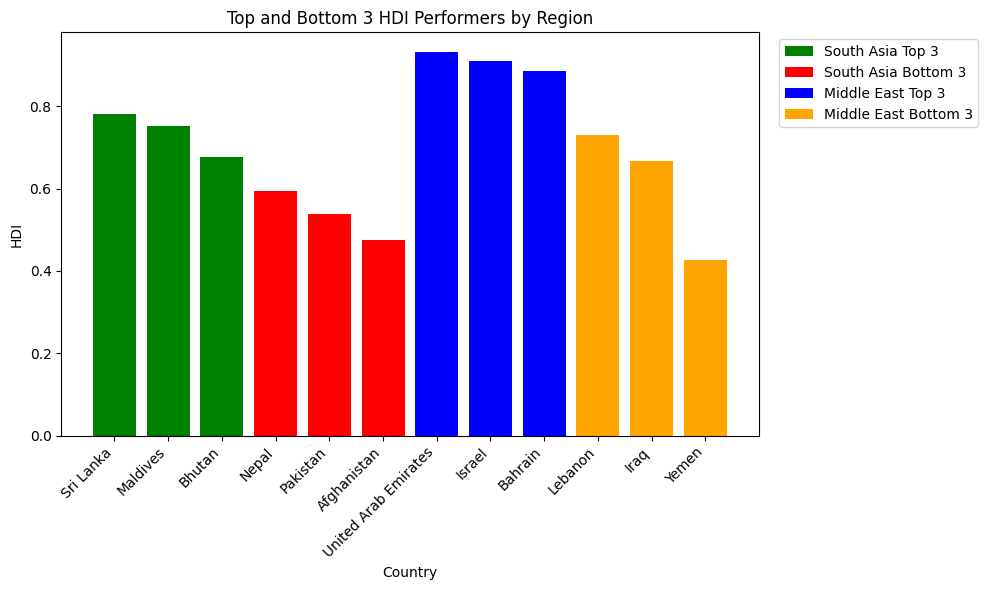

In [53]:
plt.figure(figsize=(10,6))
plt.bar(south_Asia_Top_3['country'],south_Asia_Top_3['hdi'],color='green',label='South Asia Top 3')
plt.bar(south_Asia_Buttom_3['country'],south_Asia_Buttom_3['hdi'],color='red',label='South Asia Bottom 3')
plt.bar(middle_east_Top_3['country'],middle_east_Top_3['hdi'],color='blue',label='Middle East Top 3')
plt.bar(middle_east_Buttom_3['country'],middle_east_Buttom_3['hdi'],color='orange',label='Middle East Bottom 3')
plt.xticks(rotation=45, ha="right")
plt.xlabel("Country")
plt.ylabel("HDI")
plt.title("Top and Bottom 3 HDI Performers by Region")
plt.legend(loc="upper left",bbox_to_anchor=(1.02, 1))
plt.tight_layout()
plt.show()


top counrty with best HDI performence by region is srilanka maldives and bhutan in south asia and uae , israel and bahrain in middle east while buttom countries in south asia is afganistan pakistana and nepal and in middle east yemen iraq and lebanon.

### Task 4: Metric Comparisons Across Regions
Gender Development Index, Life Expectancy Index, and GNI per Capita Index were compared across regions using grouped bar charts to identify disparities.

In [54]:
metrics = ["gender_development", "life_expectancy", "gross_inc_percap"]
south_asia_means = sa_2020_22[metrics].mean()
middle_east_means = me_2020_22[metrics].mean()
metric_df = pd.DataFrame({
    "South Asia": south_asia_means,
    "Middle East": middle_east_means
})
metric_df

,South Asia,Middle East
gender_development,0.881458,0.896545
life_expectancy,70.970083,75.855455
gross_inc_percap,7766.509931,37750.770520


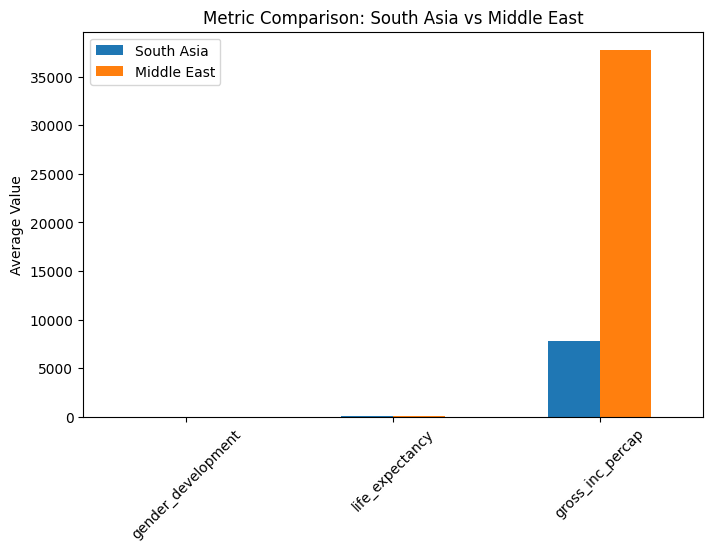

In [55]:
metric_df.plot(kind='bar', figsize=(8,5))
plt.title("Metric Comparison: South Asia vs Middle East")
plt.ylabel("Average Value")
plt.xticks(rotation=45)
plt.show()


Middle east has better metric than south asia

In [56]:
disparity = (metric_df["Middle East"] - metric_df["South Asia"]).abs()
disparity

,0
gender_development,0.015087
life_expectancy,4.885371
gross_inc_percap,29984.260588


### Task 5: HDI Disparity Analysis
HDI variation within each region was measured using range and coefficient of variation to determine which region showed greater inequality.

In [57]:
# HDI range
sa_range = sa_2020_22['hdi'].max() - sa_2020_22['hdi'].min()
me_range = me_2020_22['hdi'].max() - me_2020_22['hdi'].min()

# Coefficient of Variation (CV)
sa_cv = sa_2020_22['hdi'].std() / sa_2020_22['hdi'].mean()
me_cv = me_2020_22['hdi'].std() / me_2020_22['hdi'].mean()

sa_range, me_range, sa_cv, me_cv


(0.321,
 0.5130000000000001,
 np.float64(0.1536520924690084),
 np.float64(0.17910145193048382))

### Task 6: Correlation Analysis

Correlations between HDI and key development metrics were computed separately for each region and visualized using scatter plots.

In [58]:
# South Asia correlation
sa_corr = sa_2020_22[['hdi', 'gender_development', 'life_expectancy']].corr()

# Middle East correlation
me_corr = me_2020_22[['hdi', 'gender_development', 'life_expectancy']].corr()

sa_corr, me_corr


(                         hdi  gender_development  life_expectancy
 hdi                 1.000000            0.874218         0.938764
 gender_development  0.874218            1.000000         0.853780
 life_expectancy     0.938764            0.853780         1.000000,
                          hdi  gender_development  life_expectancy
 hdi                 1.000000            0.935670         0.933123
 gender_development  0.935670            1.000000         0.912836
 life_expectancy     0.933123            0.912836         1.000000)

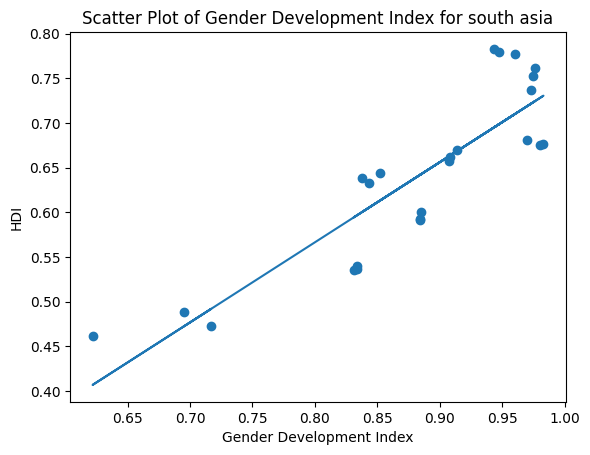

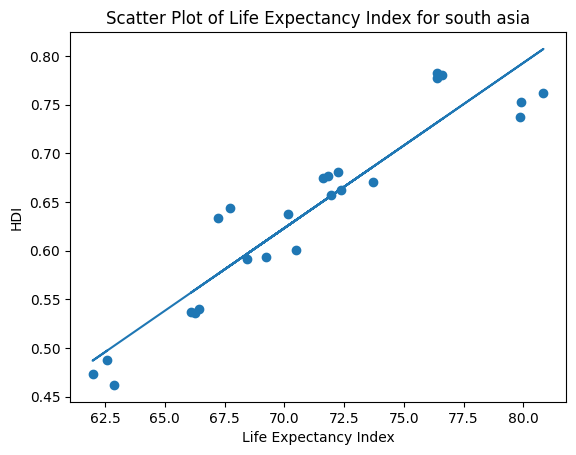

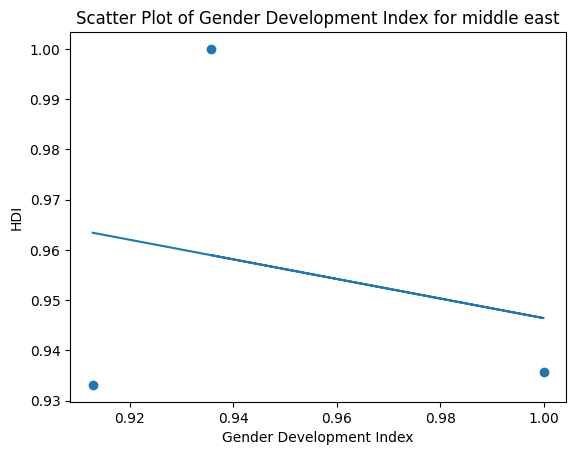

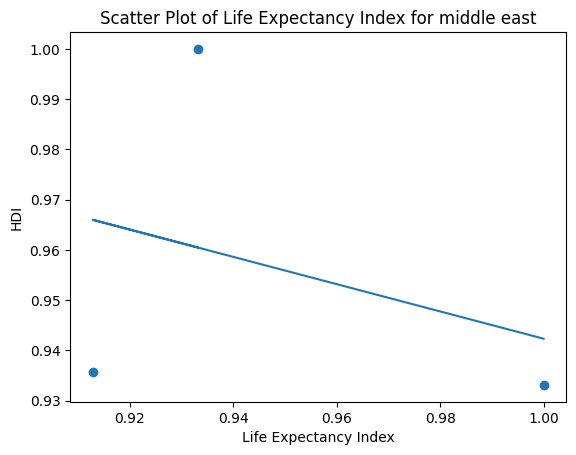

In [59]:
x=sa_2020_22['gender_development']
y=sa_2020_22['hdi']
plt.scatter(data=sa_2020_22, x='gender_development', y='hdi')
m,b=np.polyfit(x,y,1)
plt.plot(x, m*x + b)
plt.xlabel('Gender Development Index')
plt.ylabel('HDI')
plt.title('Scatter Plot of Gender Development Index for south asia')
plt.show()
x=sa_2020_22['life_expectancy']
y=sa_2020_22['hdi']
plt.scatter(data=sa_2020_22, x='life_expectancy', y='hdi')
m,b=np.polyfit(x,y,1)
plt.plot(x, m*x + b)
plt.xlabel('Life Expectancy Index')
plt.ylabel('HDI')
plt.title('Scatter Plot of Life Expectancy Index for south asia')
plt.show()
x=me_corr['gender_development']
y=me_corr['hdi']
plt.scatter(data=me_corr, x='gender_development', y='hdi')
m,b=np.polyfit(x,y,1)
plt.plot(x, m*x + b)
plt.xlabel('Gender Development Index')
plt.ylabel('HDI')
plt.title('Scatter Plot of Gender Development Index for middle east')
plt.show()
x=me_corr['life_expectancy']
y=me_corr['hdi']
plt.scatter(data=me_corr, x='life_expectancy', y='hdi')
m,b=np.polyfit(x,y,1)
plt.plot(x, m*x + b)
plt.xlabel('Life Expectancy Index')
plt.ylabel('HDI')
plt.title('Scatter Plot of Life Expectancy Index for middle east')
plt.show()

### Task 7: Outlier Detection
Outliers in HDI and GNI per capita were identified for both regions using the IQR method and discussed in the context of regional development differences.

In [60]:
def detect_outliers(df_region, column):
    Q1 = df_region[column].quantile(0.25)
    Q3 = df_region[column].quantile(0.75)
    IQR = Q3 - Q1
    return df_region[
        (df_region[column] < Q1 - 1.5 * IQR) |
        (df_region[column] > Q3 + 1.5 * IQR)
    ]


In [63]:
sa_outliers_hdi = detect_outliers(sa_2020_22, 'hdi')
me_outliers_gni = detect_outliers(me_2020_22, 'gross_inc_percap')


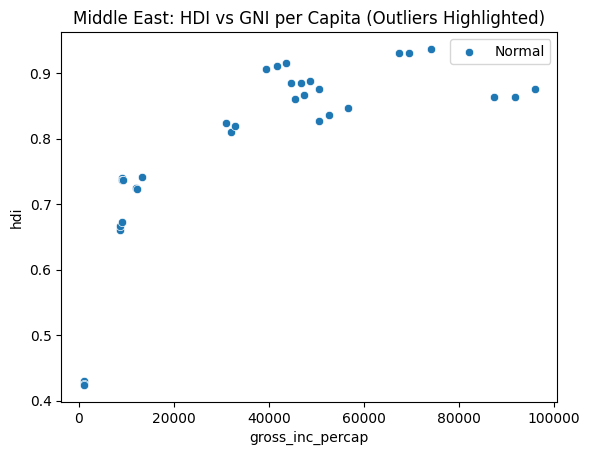

In [65]:
plt.figure()
sns.scatterplot(data=me_2020_22, x='gross_inc_percap', y='hdi', label='Normal')
sns.scatterplot(data=me_outliers_gni, x='gross_inc_percap', y='hdi', color='red', label='Outliers')
plt.title("Middle East: HDI vs GNI per Capita (Outliers Highlighted)")
plt.show()


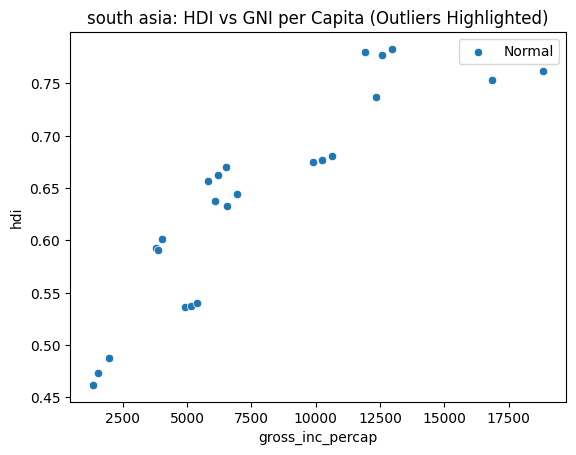

In [67]:
plt.figure()
sns.scatterplot(data=sa_2020_22, x='gross_inc_percap', y='hdi', label='Normal')
sns.scatterplot(data=sa_outliers_hdi, x='gross_inc_percap', y='hdi', color='red', label='Outliers')
plt.title("south asia: HDI vs GNI per Capita (Outliers Highlighted)")
plt.show()

From the Above graph we can see that middle east has better HDI and GNI than south asia region .